~ Logistic Regression Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the CSV file into a DataFrame
final_dataset = pd.read_csv('final_dataset.csv')

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(final_dataset.head())

# Prepare feature matrix X and target variable y
X = final_dataset[['Avg Temp', 'Temp Flux']]  # Make sure these columns exist in your CSV file
final_dataset['Pandemic Indicator'] = (final_dataset['Pandemic Indicator'] > 0.05).astype(int)
y = final_dataset['Pandemic Indicator']

# Check for balance in the dataset
pandemic_counts = y.value_counts()
print("Class Distribution:")
print(pandemic_counts)

# Ensure there is a balanced number of over/under-threshold data points
if min(pandemic_counts) < 0.4 * len(y):  # Adjust the threshold as needed
    print("Warning: Imbalanced data detected. Consider balancing using resampling techniques.")

     State   County        Week  cases_per_100K_7_day_count_change  Avg Temp  \
0  Alabama  Autauga  2022-10-20                              53.70     14.82   
1  Alabama  Autauga  2022-10-27                              50.12     14.58   
2  Alabama  Autauga  2022-11-03                              55.49     16.88   
3  Alabama  Autauga  2022-11-10                             107.39     19.69   
4  Alabama  Autauga  2022-11-17                              37.59     10.04   

   Temp Flux  Pandemic Indicator  
0      -0.24                   0  
1      -0.24                   0  
2       2.30                   0  
3       2.81                   1  
4      -9.65                   0  
Class Distribution:
Pandemic Indicator
0    46620
1    46620
Name: count, dtype: int64


In [13]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"RMSE: {rmse:.4f}")

Accuracy: 0.5833
Log Loss: 0.6738
RMSE: 0.6456


~ Average Temperature vs Pandemic Indicator

C:\Users\madis\AppData\Local\Temp\ipykernel_25296\582753358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pandemic Indicator', y='Avg Temp', data=final_dataset, palette='muted')


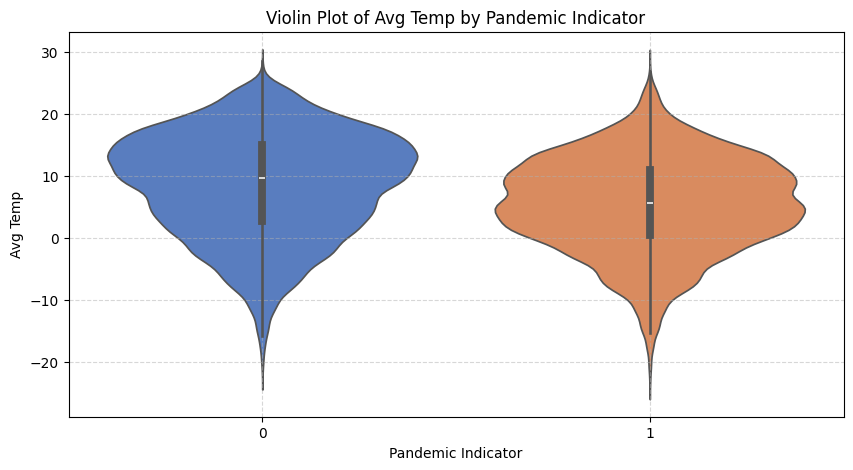

In [14]:
# Violin plot for Avg Temp vs Pandemic Indicator
plt.figure(figsize=(10, 5))
sns.violinplot(x='Pandemic Indicator', y='Avg Temp', data=final_dataset, palette='muted')
plt.title('Violin Plot of Avg Temp by Pandemic Indicator')
plt.xlabel('Pandemic Indicator')
plt.ylabel('Avg Temp')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

~ Temp Flux vs Pandemic Indicator

C:\Users\madis\AppData\Local\Temp\ipykernel_25296\1886347121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pandemic Indicator', y='Temp Flux', data=final_dataset, palette='muted')


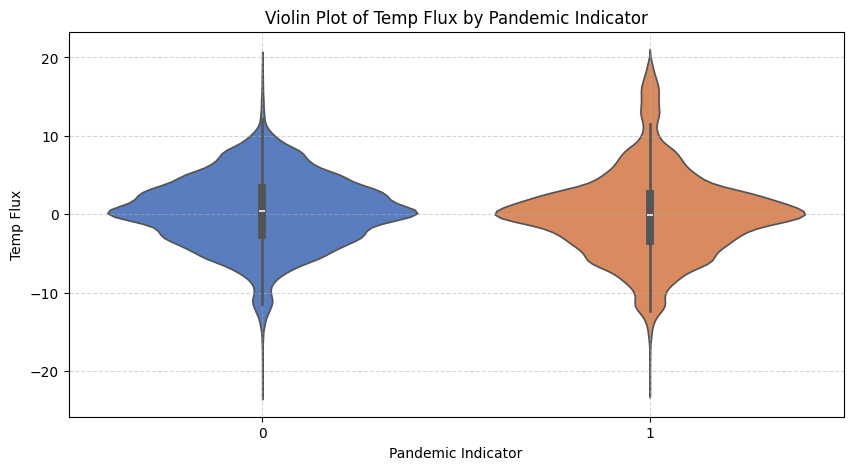

In [15]:
# Violin plot for Temp Flux vs Pandemic Indicator
plt.figure(figsize=(10, 5))
sns.violinplot(x='Pandemic Indicator', y='Temp Flux', data=final_dataset, palette='muted')
plt.title('Violin Plot of Temp Flux by Pandemic Indicator')
plt.xlabel('Pandemic Indicator')
plt.ylabel('Temp Flux')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()